In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
%matplotlib inline

In [2]:
a = 0.1
b = 0.1
c = 14.

def fun(r,t):
    return np.array([-r[1]-r[2],r[0]+a*r[1],b + r[2]*(r[0]-c)]) 

In [3]:
tmax = 600.
times = np.linspace(0.,tmax,100000)
funsol,others = odeint(fun,[1.,1.,1.],times,full_output=True)

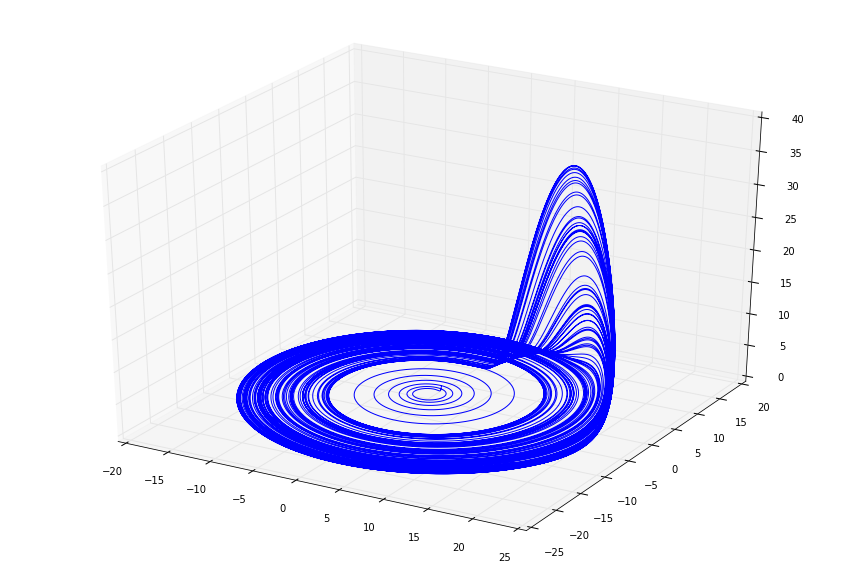

In [4]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
x = funsol[:,0]
y = funsol[:,1]
z = funsol[:,2]
ax.plot(x, y, z )

plt.show()


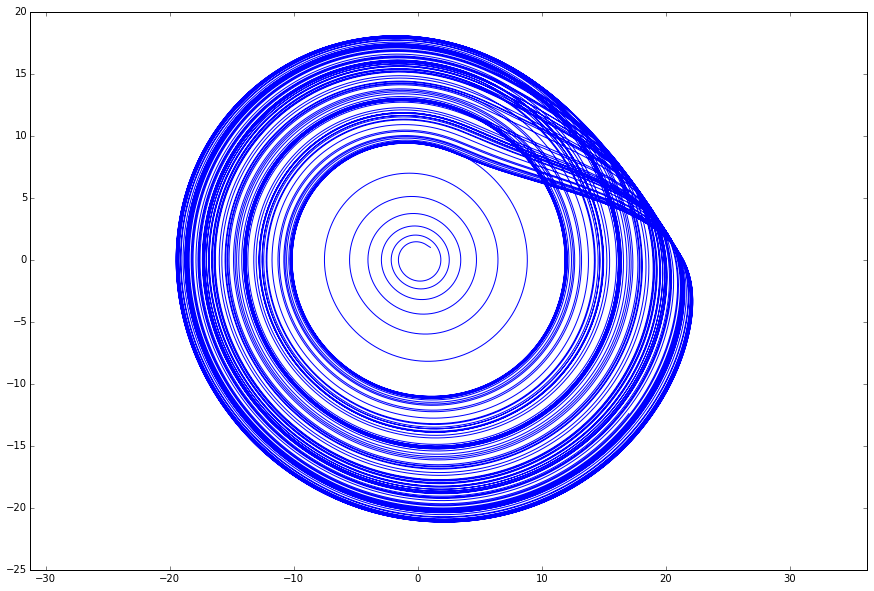

In [5]:
fig = plt.figure(figsize=(15,10))
plt.plot(x, y )
plt.axis('equal')
plt.show()

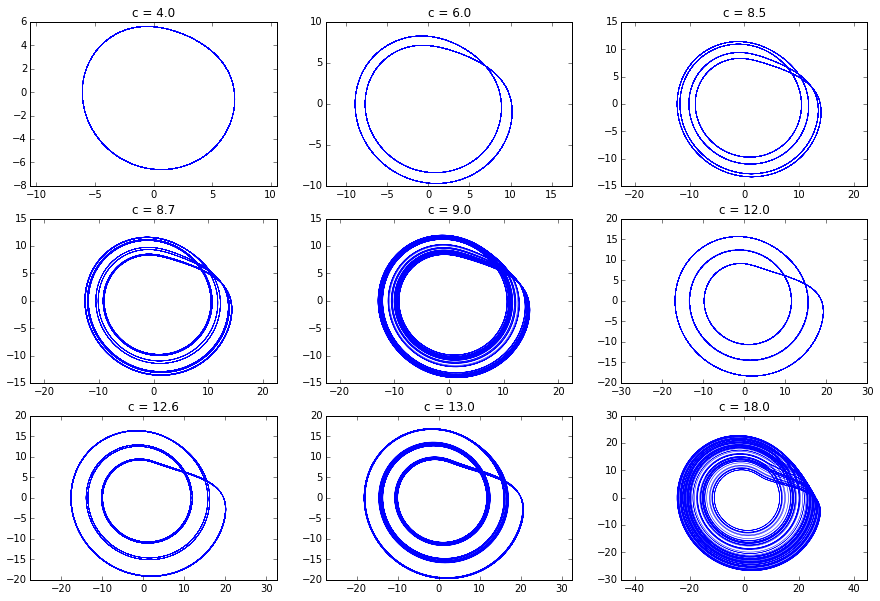

In [6]:
c = np.array([4.,6.,8.5,8.7,9.,12.,12.6,13.,18.])

tmax = 600.
times = np.linspace(0.,tmax,10000)

fig = plt.figure(figsize=(15,10))

for i in range(len(c)):
    
    def fun(r,t):
        return np.array([-r[1]-r[2],r[0]+a*r[1],b + r[2]*(r[0]-c[i])]) 
    
    funsol,others = odeint(fun,[1.,1.,1.],times,full_output=True)
    fig.add_subplot(3,3,i+1)
    x = funsol[:,0][2000:]
    y = funsol[:,1][2000:]
    plt.plot(x, y,linewidth=0.5)
    plt.axis('equal')
    plt.title('c = ' + str(c[i]))

plt.show()

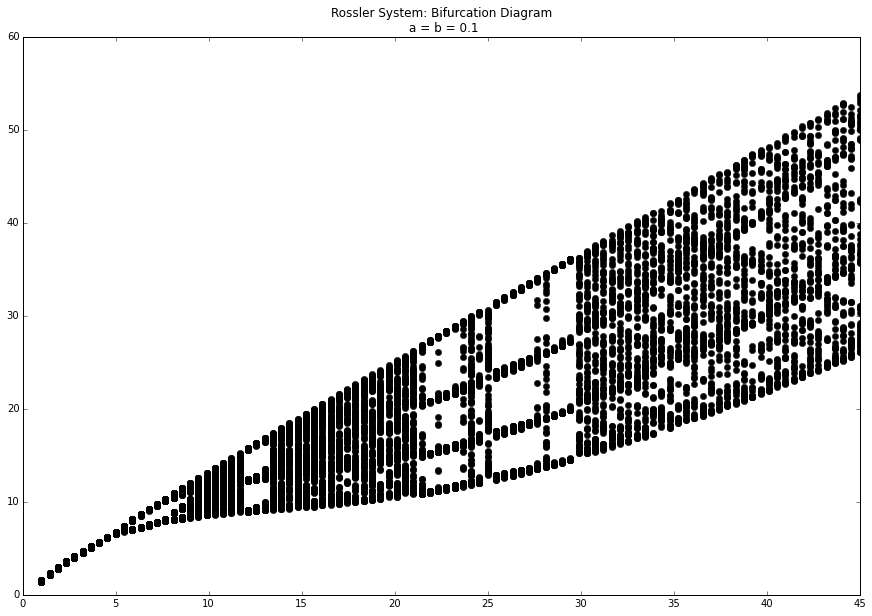

In [7]:
c = np.linspace(1.,45.,100)

x = np.array([])
y = np.array([])

fig = plt.figure(figsize=(15,10))
plt.title('Rossler System: Bifurcation Diagram\n a = b = 0.1')

for i in range(len(c)):
    
    def fun(r,t):
        return np.array([-r[1]-r[2],r[0]+a*r[1],b + r[2]*(r[0]-c[i])]) 
        
    funsol,others = odeint(fun,[1.,1.,1.],times,full_output=True)
    
    sol_x = funsol[:,0][2000:]
    sol_y = funsol[:,1][2000:]
    
    for j in range(len(sol_x)):
        if (np.absolute(sol_x[j])<=1 and sol_y[j] >= 0):
            x = np.append(x,c[i])
            y = np.append(y, sol_y[j])
            
plt.plot(x,y,'ko')
plt.show()

In [27]:
%matplotlib

a = 0.1
b = 0.1
c = 14.

def fun(r,t):
    return np.array([-r[1]-r[2],r[0]+a*r[1],b + r[2]*(r[0]-c)]) 

tmax = 600.
times = np.linspace(0.,tmax,20000)
funsol,others = odeint(fun,[1.,1.,1.],times,full_output=True)

x = funsol[:,0][-4000:]
y = funsol[:,1][-4000:]
z = funsol[:,2][-4000:]

r = np.array([[x[i],y[i],z[i]] for i in range(len(x))])

fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-25., 25.), ylim=(-20., 30.))
ax.set_aspect('equal')

graph, = ax.plot([],[],lw=2)

angles = np.linspace(0.,2.*np.pi,20)

def animate(i):
    
    n1 = np.array([-np.sin(angles[i]),np.cos(angles[i]),0.])
    n2 = np.array([-np.cos(np.pi/4.)*np.cos(angles[i]),-np.cos(np.pi/4.)*np.sin(angles[i]),np.sin(np.pi/4.)])
    
    new_x= np.array([])
    new_y= np.array([])
    
    for i in range(len(r)):
        projec_1 = sum(r[i]*n1)
        projec_2 = sum(r[i]*n2)
        new_x = np.append(new_x,projec_1)
        new_y = np.append(new_y,projec_2)
    
    graph.set_data(new_x,new_y)
    
    return graph

ani = animation.FuncAnimation(fig, animate, 20 ,
    interval=1, blit=False,repeat_delay=1000)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save(u'Rotación.mp4', writer=writer)

#plt.show()

Using matplotlib backend: Qt4Agg


KeyError: 'ffmpeg'